In [64]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [65]:
df = pd.read_csv('data/results.csv', usecols=['meters', 'price', 'rooms', 'dealer', 'district'], na_values=['Zapytajocenę'])

In [66]:
df.head(3)

,meters,price,rooms,dealer,district
0,61.8,369000.0,4,Ofertaprywatna,LSM
1,79.0,489000.0,3,PółnocNieruchomościFranczyza,LSM
2,60.0,375000.0,3,PrestigeBroker,Węglin


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2695 entries, 0 to 2694
Data columns (total 5 columns):
meters      2695 non-null float64
price       2537 non-null float64
rooms       2695 non-null int64
dealer      2619 non-null object
district    2695 non-null object
dtypes: float64(2), int64(1), object(2)
memory usage: 105.4+ KB


In [72]:
top_dealers = pd.value_counts(df['dealer'].values)[0:30]
top_dealers

3KLUCZEs.c.                               317
CLIVUSNieruchomości                       215
FRANCZEWSKANieruchomościs.c.              153
4tepiętro                                 144
Arena                                     117
Ofertaprywatna                             98
LUKsp.zo.o.SKA                             98
BiuroNieruchomościKWADRAT                  95
HomeBrokerS.A.                             86
BIGCITYBROKER                              76
LubelskieMieszkania                        68
Lokum                                      64
LUKJacekWysokiński                         62
WMNieruchomości                            59
HERMESHOUSE                                59
ŻagielDomSp.zo.o.                          58
NieruchomościLalakPropertiesSpzo.o.SKA     48
Alfahouse                                  42
InvestorNieruchomościFranchise             41
ExpressHouse                               39
StrefaM                                    35
PółnocNieruchomościFranczyza      

In [73]:
df["district"].value_counts()[0:20]

Wrotków            344
Czuby              297
Węglinek           292
Śródmieście        198
Czechów            171
Bronowice          157
LSM                150
Felin              141
Dziesiąta          122
Centrum             94
lubelskie           85
Wieniawa            67
Sławin              66
Kośminek            58
Sławinek            56
Kalinowszczyzna     56
Ponikwoda           49
Szerokie            36
Bazylianówka        26
Zana                25
Name: district, dtype: int64

In [74]:
q = df["meters"].quantile(0.99)
df = df[df["meters"] < q]

In [75]:
df["price_m2"] = round(df["price"] / df["meters"])
df.head()

,meters,price,rooms,dealer,district,price_m2
0,61.8,369000.0,4,Ofertaprywatna,LSM,5971.0
1,79.0,489000.0,3,PółnocNieruchomościFranczyza,LSM,6190.0
2,60.0,375000.0,3,PrestigeBroker,Węglin,6250.0
3,58.5,389000.0,2,HomeBrokerS.A.,Ponikwoda,6650.0
4,56.0,379500.0,2,HomeBrokerS.A.,Czuby,6777.0


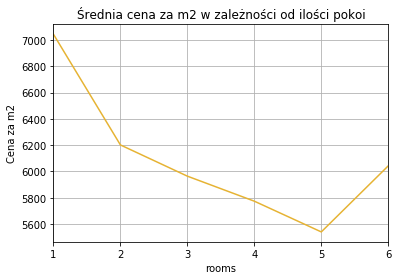

In [76]:
fig = plt.figure(1)
plt.title("Średnia cena za m2 w zależności od ilości pokoi")
plt.grid()
plt.ylabel("Cena za m2")
df["price_m2"].groupby(df["rooms"]).agg(np.mean).plot(color = (0.9,0.7,0.2))
plt.grid(True)
fig.savefig('avg_price_m2_rooms.pdf')

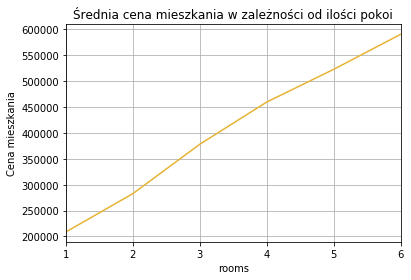

In [77]:
fig = plt.figure(2)
plt.title("Średnia cena mieszkania w zależności od ilości pokoi")
plt.ylabel("Cena mieszkania")
df["price"].groupby(df["rooms"]).agg(np.mean).plot(color = (0.9,0.7,0.2))
plt.grid(True)
fig.savefig('avg_price_rooms.pdf')